In [3]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('results_final_patterns').getOrCreate()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Loading the results dataset
df = pd.read_csv("Datasets/gbt_results_final.csv")

In [4]:
# adding a column to show if model was correct or not
df['prediction'] = df['prediction'].astype(int)
df['correct'] = np.where(df['fire'] == df['prediction'], True, False)
df['correct numeric'] = np.where(df['fire'] == df['prediction'], 1, 0)
df.head()

,id1,id2,X,Y,month,day,FFMC,DMC,DC,ISI,...,rain,fire,month nominal,label,dayIndex,features,scaledFeatures,prediction,correct,correct numeric
0,12,13,6,5,sep,mon,90.9,126.5,686.5,7.0,...,0.0,0,9,0,3.0,"[6.0,5.0,90.9,9.0,3.0,126.5,686.5,7.0,21.3,42....","[2.571326996428601,3.982381463271727,50.239674...",0,True,1
1,13,14,6,5,sep,wed,92.9,133.3,699.6,9.2,...,0.0,0,9,0,6.0,"[6.0,5.0,92.9,9.0,6.0,133.3,699.6,9.2,26.4,21....","[2.571326996428601,3.982381463271727,51.345057...",0,True,1
2,22,25,7,4,aug,sun,91.4,142.4,601.4,10.6,...,0.0,0,8,0,0.0,"[7.0,4.0,91.4,8.0,0.0,142.4,601.4,10.6,16.3,60...","[2.9998814958333675,3.1859051706173815,50.5160...",1,False,0
3,33,37,7,4,oct,fri,90.0,41.5,682.6,8.7,...,0.0,0,10,0,1.0,"[7.0,4.0,90.0,10.0,1.0,41.5,682.6,8.7,11.3,60....","[2.9998814958333675,3.1859051706173815,49.7422...",0,True,1
4,37,41,4,4,aug,sat,90.2,96.9,624.2,8.9,...,0.0,0,8,0,2.0,"[4.0,4.0,90.2,8.0,2.0,96.9,624.2,8.9,18.4,42.0...","[1.7142179976190672,3.1859051706173815,49.8527...",0,True,1


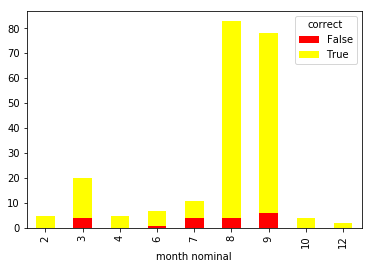

In [5]:
#Stacked bar graph for correct by month
month_bar = pd.crosstab(df['month nominal'], df['correct'])
month_bar.plot(kind='bar', stacked=True, color=['red', 'yellow'], grid=False)

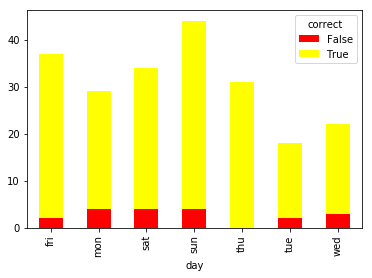

In [6]:
#Stacked bar graph for correct by day
month_bar = pd.crosstab(df['day'], df['correct'])
month_bar.plot(kind='bar', stacked=True, color=['red', 'yellow'], grid=False)

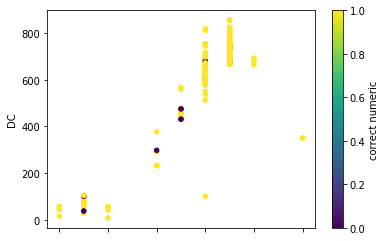

In [7]:
#scatter plot for month and DC by correct
df.plot.scatter(x='month nominal', y='DC', c='correct numeric', colormap='viridis')

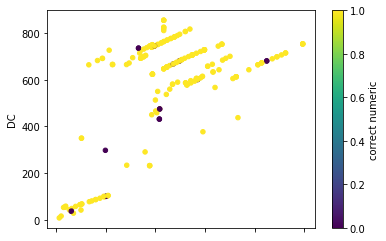

In [8]:
#scatter plot for month and DC by correct
df.plot.scatter(x='DMC', y='DC', c='correct numeric', colormap='viridis')

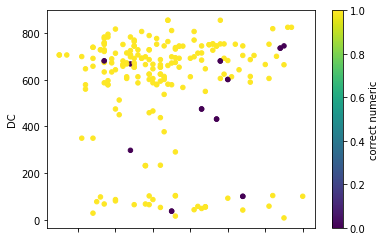

In [9]:
df.plot.scatter(x='RH', y='DC', c='correct numeric', colormap='viridis')

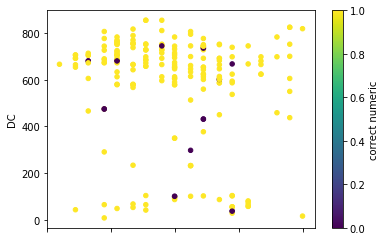

In [10]:
df.plot.scatter(x='wind', y='DC', c='correct numeric', colormap='viridis')

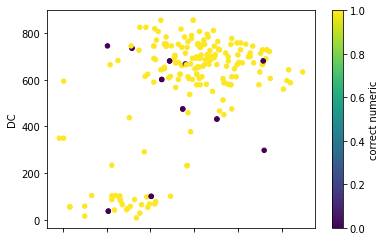

In [11]:
df.plot.scatter(x='temp', y='DC', c='correct numeric', colormap='viridis')

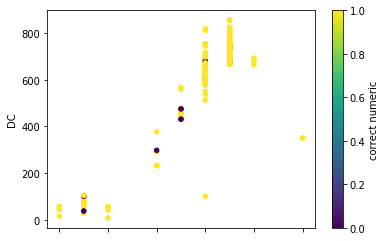

In [12]:
df.plot.scatter(x='month nominal', y='DC', c='correct numeric', colormap='viridis')

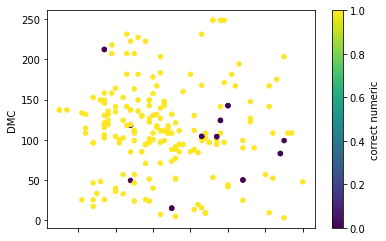

In [13]:
#DMC against RH, wind, temp, month nominal
df.plot.scatter(x='RH', y='DMC', c='correct numeric', colormap='viridis')

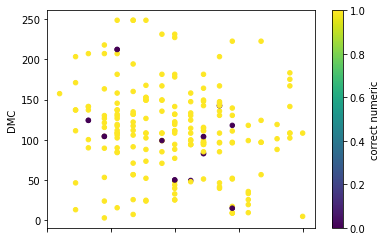

In [14]:
df.plot.scatter(x='wind', y='DMC', c='correct numeric', colormap='viridis')

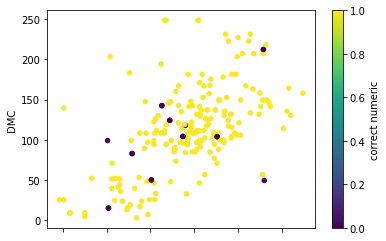

In [15]:
df.plot.scatter(x='temp', y='DMC', c='correct numeric', colormap='viridis')

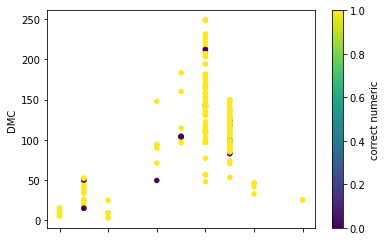

In [16]:
df.plot.scatter(x='month nominal', y='DMC', c='correct numeric', colormap='viridis')

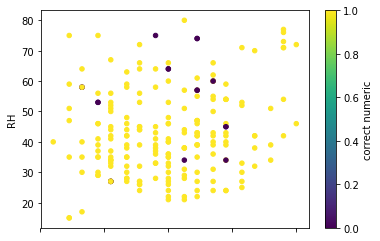

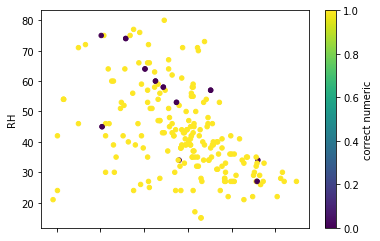

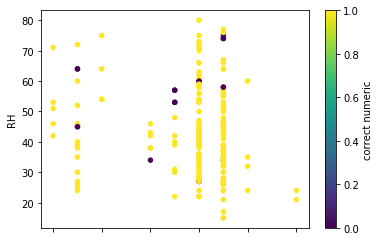

In [17]:
#RH against wind, temp, month nominal
df.plot.scatter(x='wind', y='RH', c='correct numeric', colormap='viridis')
df.plot.scatter(x='temp', y='RH', c='correct numeric', colormap='viridis')
df.plot.scatter(x='month nominal', y='RH', c='correct numeric', colormap='viridis')

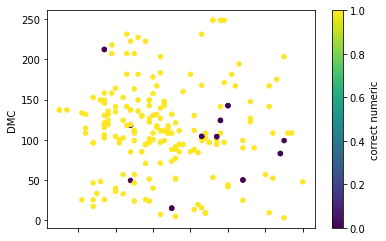

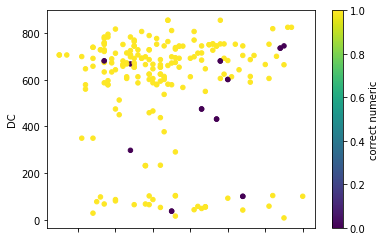

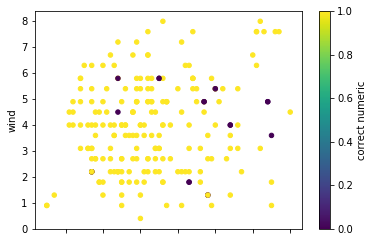

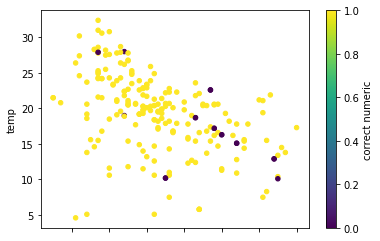

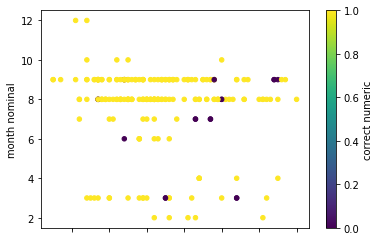

In [18]:
#RH against DMC, DC, wind, temp, month nominal

df.plot.scatter(x='RH', y='DMC', c='correct numeric', colormap='viridis')
df.plot.scatter(x='RH', y='DC', c='correct numeric', colormap='viridis')
df.plot.scatter(x='RH', y='wind', c='correct numeric', colormap='viridis')
df.plot.scatter(x='RH', y='temp', c='correct numeric', colormap='viridis')
df.plot.scatter(x='RH', y='month nominal', c='correct numeric', colormap='viridis')

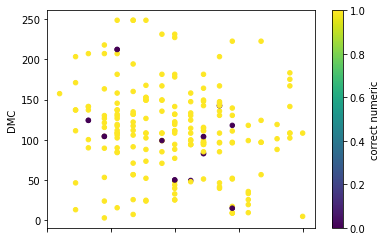

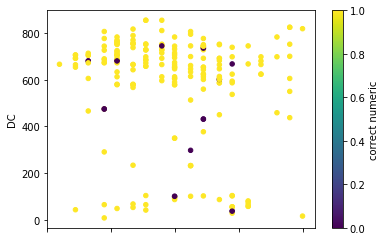

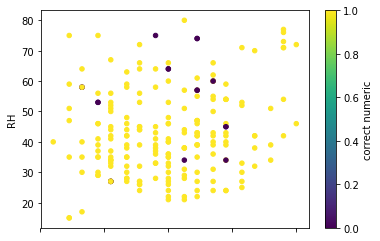

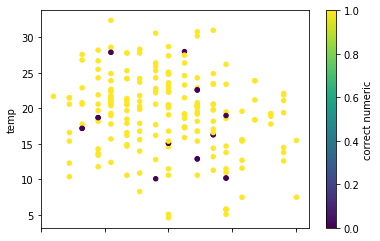

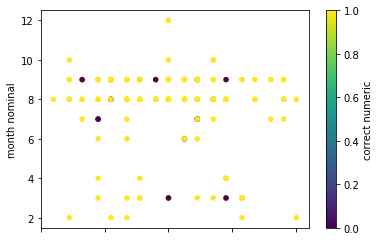

In [19]:
#wind against DMC, DC, RH, temp, month nominal

df.plot.scatter(x='wind', y='DMC', c='correct numeric', colormap='viridis')
df.plot.scatter(x='wind', y='DC', c='correct numeric', colormap='viridis')
df.plot.scatter(x='wind', y='RH', c='correct numeric', colormap='viridis')
df.plot.scatter(x='wind', y='temp', c='correct numeric', colormap='viridis')
df.plot.scatter(x='wind', y='month nominal', c='correct numeric', colormap='viridis')

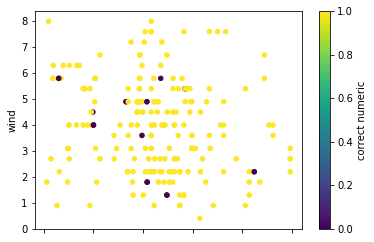

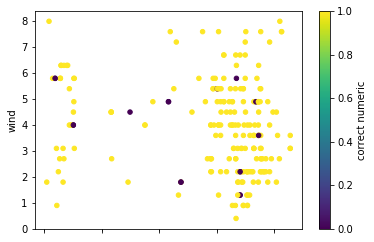

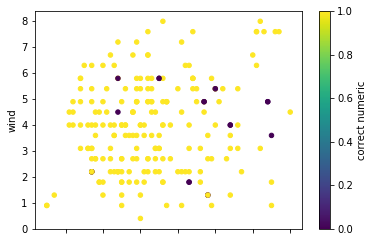

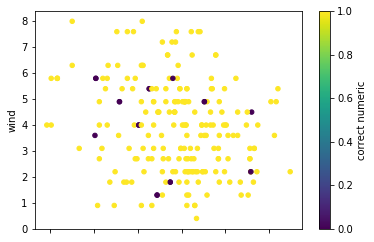

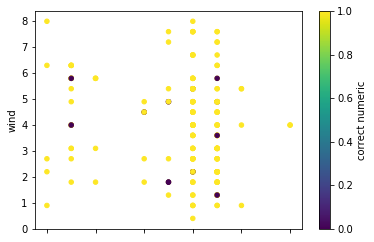

In [20]:
#wind against DMC, DC, RH, temp, month nominal

df.plot.scatter(x='DMC', y='wind', c='correct numeric', colormap='viridis')
df.plot.scatter(x='DC', y='wind', c='correct numeric', colormap='viridis')
df.plot.scatter(x='RH', y='wind', c='correct numeric', colormap='viridis')
df.plot.scatter(x='temp', y='wind', c='correct numeric', colormap='viridis')
df.plot.scatter(x='month nominal', y='wind', c='correct numeric', colormap='viridis')

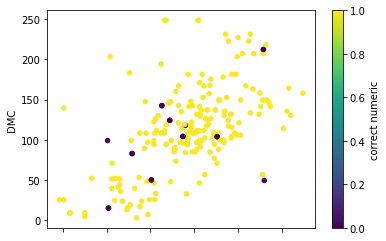

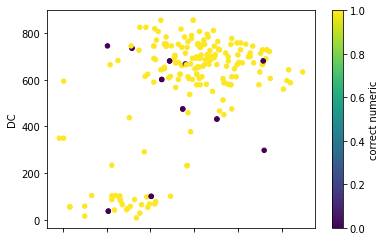

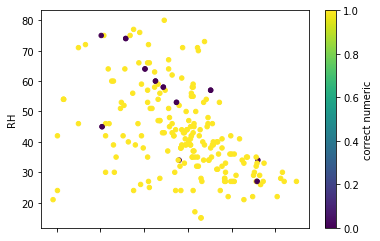

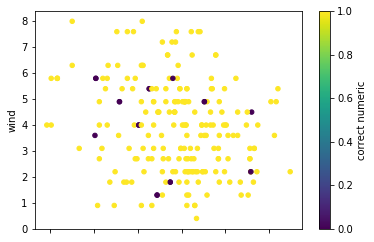

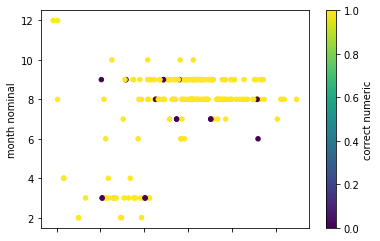

In [21]:
#temp against DMC, DC, RH, wind, month nominal

df.plot.scatter(x='temp', y='DMC', c='correct numeric', colormap='viridis')
df.plot.scatter(x='temp', y='DC', c='correct numeric', colormap='viridis')
df.plot.scatter(x='temp', y='RH', c='correct numeric', colormap='viridis')
df.plot.scatter(x='temp', y='wind', c='correct numeric', colormap='viridis')
df.plot.scatter(x='temp', y='month nominal', c='correct numeric', colormap='viridis')

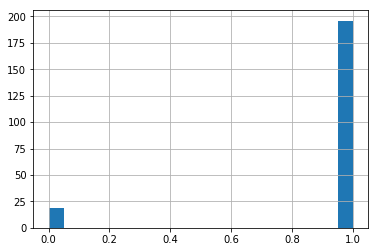

In [22]:
df['correct'].hist(bins=20)

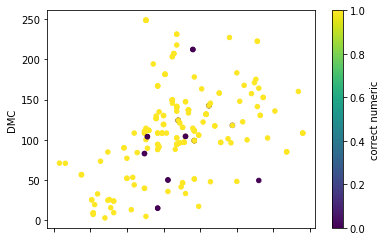

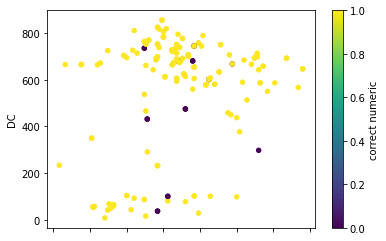

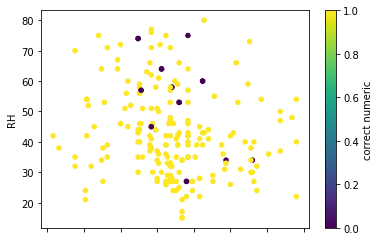

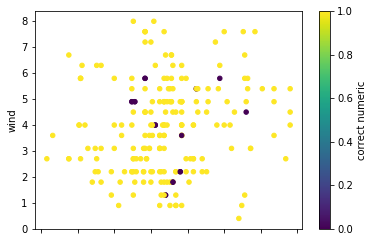

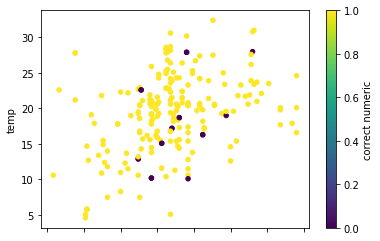

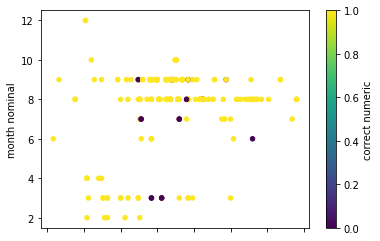

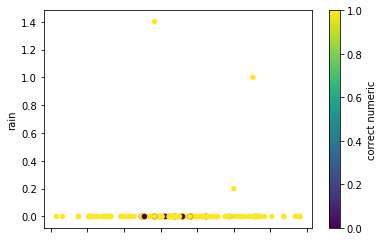

In [23]:
#ISI against temp, DMC, DC, RH, wind, month nominal

df.plot.scatter(x='ISI', y='DMC', c='correct numeric', colormap='viridis')
df.plot.scatter(x='ISI', y='DC', c='correct numeric', colormap='viridis')
df.plot.scatter(x='ISI', y='RH', c='correct numeric', colormap='viridis')
df.plot.scatter(x='ISI', y='wind', c='correct numeric', colormap='viridis')
df.plot.scatter(x='ISI', y='temp', c='correct numeric', colormap='viridis')
df.plot.scatter(x='ISI', y='month nominal', c='correct numeric', colormap='viridis')
df.plot.scatter(x='ISI', y='rain', c='correct numeric', colormap='viridis')

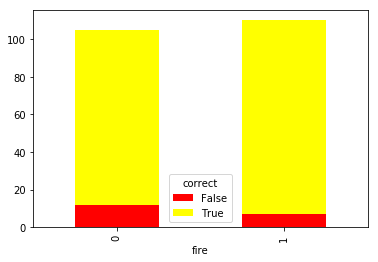

In [24]:
#Stacked bar graph for correct by day
month_bar = pd.crosstab(df['fire'], df['correct'])
month_bar.plot(kind='bar', stacked=True, color=['red', 'yellow'], grid=False)

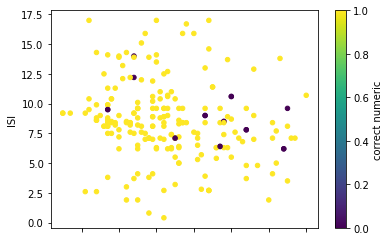

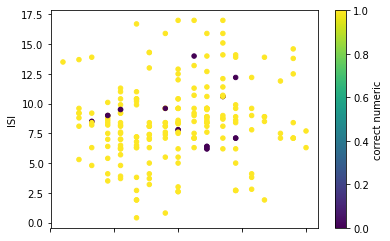

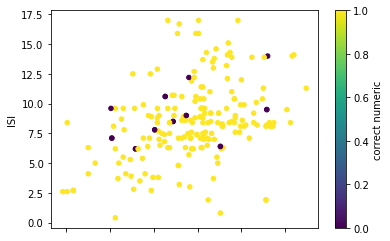

In [25]:
df.plot.scatter(x='RH', y='ISI', c='correct numeric', colormap='viridis')
df.plot.scatter(x='wind', y='ISI', c='correct numeric', colormap='viridis')
df.plot.scatter(x='temp', y='ISI', c='correct numeric', colormap='viridis')

In [26]:
df_original = pd.read_csv("Datasets/forestfires_merged.csv")
df_original.head()

,id1,id2,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,fire,month nominal
0,0,0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0,3
1,1,2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,10
2,2,3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,42,4.0,0.2,0,3
3,3,4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,42,1.8,0.0,0,3
4,4,5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0,8


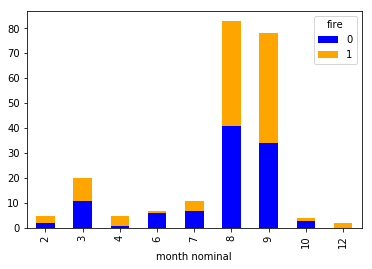

In [27]:
#Stacked bar graph for fire by month
month_bar = pd.crosstab(df['month nominal'], df['fire'])
month_bar.plot(kind='bar', stacked=True, color=['blue', 'orange'], grid=False)

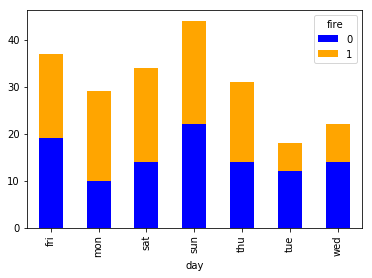

In [28]:
#Stacked bar graph for fire by day
month_bar = pd.crosstab(df['day'], df['fire'])
month_bar.plot(kind='bar', stacked=True, color=['blue', 'orange'], grid=False)

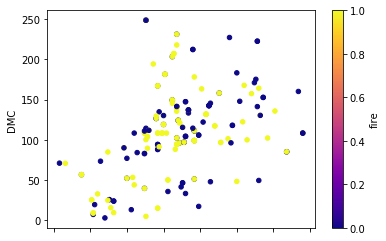

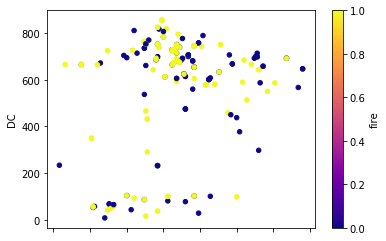

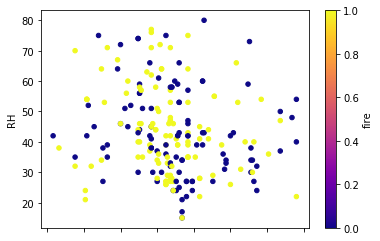

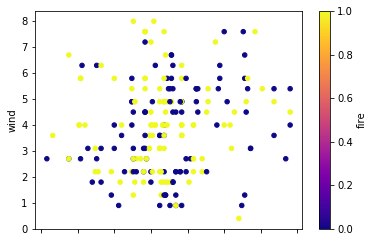

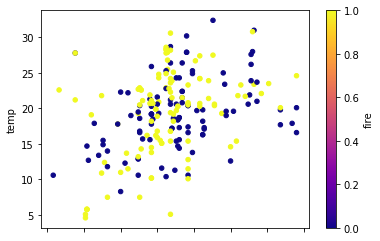

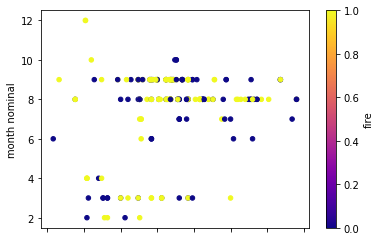

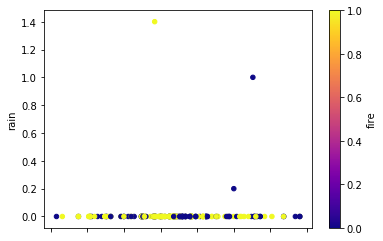

In [29]:
#ISI against temp, DMC, DC, RH, wind, month nominal

df.plot.scatter(x='ISI', y='DMC', c='fire', colormap='plasma')
df.plot.scatter(x='ISI', y='DC', c='fire', colormap='plasma')
df.plot.scatter(x='ISI', y='RH', c='fire', colormap='plasma')
df.plot.scatter(x='ISI', y='wind', c='fire', colormap='plasma')
df.plot.scatter(x='ISI', y='temp', c='fire', colormap='plasma')
df.plot.scatter(x='ISI', y='month nominal', c='fire', colormap='plasma')
df.plot.scatter(x='ISI', y='rain', c='fire', colormap='plasma')

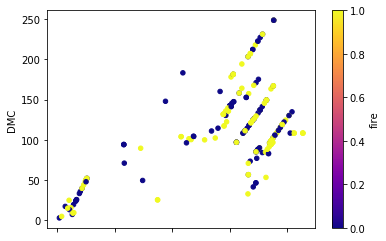

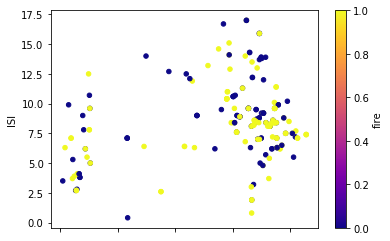

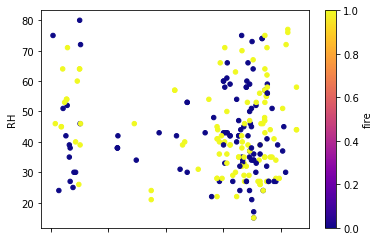

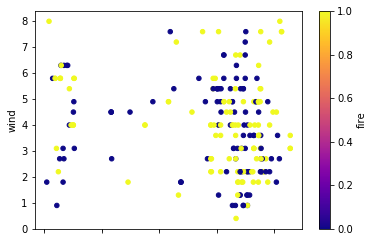

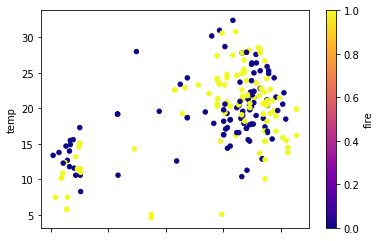

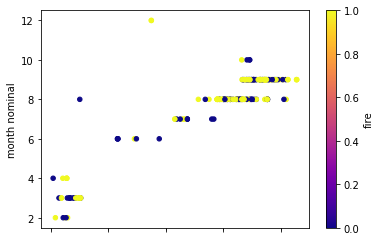

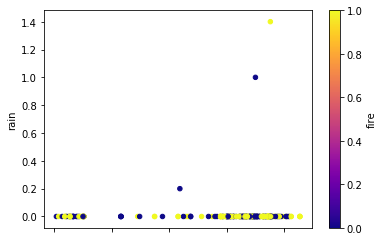

In [30]:
#DC against temp, DMC, ISI, RH, wind, month nominal

df.plot.scatter(x='DC', y='DMC', c='fire', colormap='plasma')
df.plot.scatter(x='DC', y='ISI', c='fire', colormap='plasma')
df.plot.scatter(x='DC', y='RH', c='fire', colormap='plasma')
df.plot.scatter(x='DC', y='wind', c='fire', colormap='plasma')
df.plot.scatter(x='DC', y='temp', c='fire', colormap='plasma')
df.plot.scatter(x='DC', y='month nominal', c='fire', colormap='plasma')
df.plot.scatter(x='DC', y='rain', c='fire', colormap='plasma')

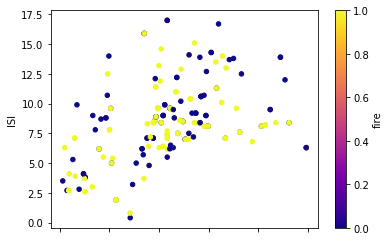

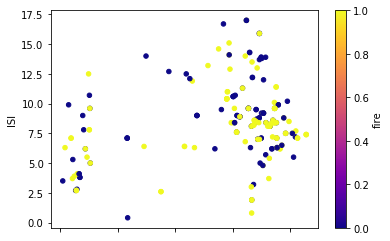

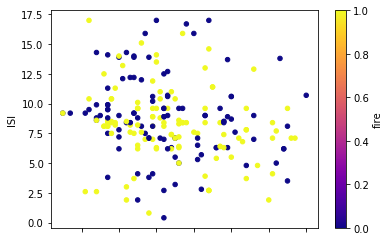

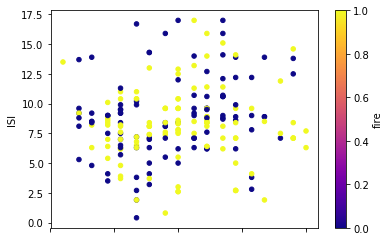

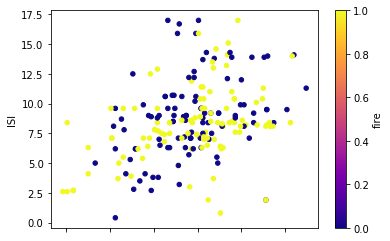

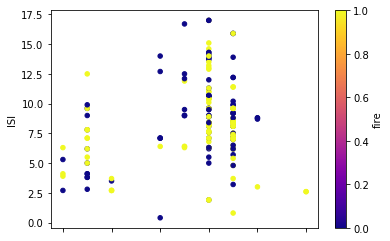

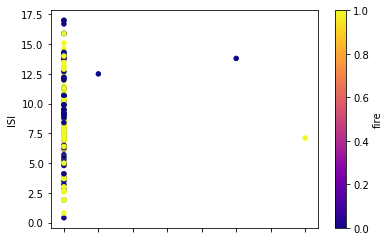

In [31]:
#ISI against temp, DMC, DC, RH, wind, month nominal

df.plot.scatter(x='DMC', y='ISI', c='fire', colormap='plasma')
df.plot.scatter(x='DC', y='ISI', c='fire', colormap='plasma')
df.plot.scatter(x='RH', y='ISI', c='fire', colormap='plasma')
df.plot.scatter(x='wind', y='ISI', c='fire', colormap='plasma')
df.plot.scatter(x='temp', y='ISI', c='fire', colormap='plasma')
df.plot.scatter(x='month nominal', y='ISI', c='fire', colormap='plasma')
df.plot.scatter(x='rain', y='ISI', c='fire', colormap='plasma')

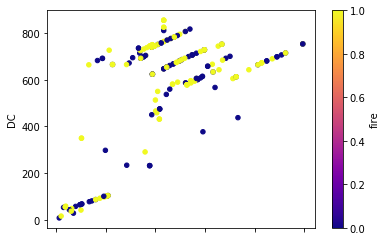

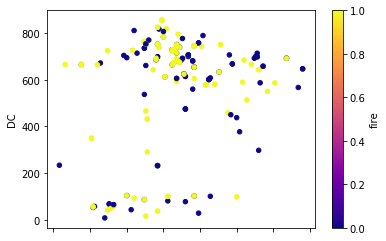

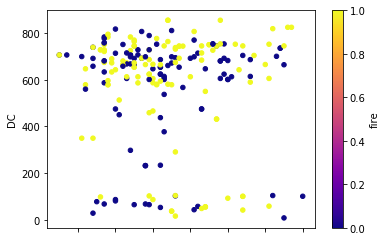

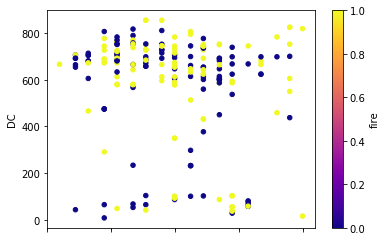

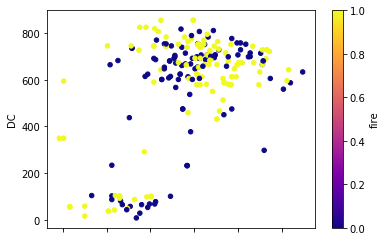

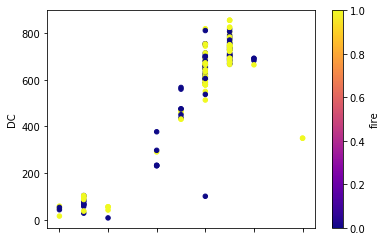

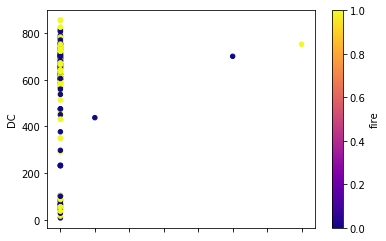

In [32]:
#DC against temp, DMC, ISI, RH, wind, month nominal

df.plot.scatter(x='DMC', y='DC', c='fire', colormap='plasma')
df.plot.scatter(x='ISI', y='DC', c='fire', colormap='plasma')
df.plot.scatter(x='RH', y='DC', c='fire', colormap='plasma')
df.plot.scatter(x='wind', y='DC', c='fire', colormap='plasma')
df.plot.scatter(x='temp', y='DC', c='fire', colormap='plasma')
df.plot.scatter(x='month nominal', y='DC', c='fire', colormap='plasma')
df.plot.scatter(x='rain', y='DC', c='fire', colormap='plasma')